<a href="https://colab.research.google.com/github/earandir/DataAnalysis/blob/main/Modulo04/sesion07/Reto-01/pruebas_ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

**Dataset:** https://raw.githubusercontent.com/manu-msr/beduadp/master/Datasets/ab_test-sales_pipeline-2.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manu-msr/beduadp/master/Datasets/ab_test-sales_pipeline-2.csv')

df

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1
...,...,...,...
76322,B,0,1
76323,A,0,1
76324,B,0,1
76325,B,1,0


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/manu-msr/beduadp/master/Datasets/ab_test-sales_pipeline.csv')

df

,test,conversion,no conversion
0,B,0,1
1,A,0,1
2,A,0,1
3,A,0,1
4,A,0,1
...,...,...,...
46322,B,0,1
46323,B,0,1
46324,B,0,1
46325,A,0,1


In [5]:
total_count = df.groupby('test')[['conversion', 'no conversion']].sum()

total_count

,conversion,no conversion
test,,
A,198,23541
B,184,22404


In [6]:
total_count['success rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])

total_count

,conversion,no conversion,success rate
test,,,
A,198,23541,0.008341
B,184,22404,0.008146


In [7]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

In [8]:
print(f'El test A fue {diferencia_en_porcentaje:.2f}% más efectivo que el test B para generar ventas.')

El test A fue 2.34% más efectivo que el test B para generar ventas.


In [9]:
all_measurements = df[['conversion', 'no conversion']]

In [10]:
value_counts = df['test'].value_counts()

value_counts

A    23739
B    22588
Name: test, dtype: int64

In [11]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
    a = df.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())
    
    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [12]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,181,23558,201,22387
1,194,23545,188,22400
2,198,23541,184,22404
3,183,23556,199,22389
4,193,23546,189,22399
...,...,...,...,...
995,203,23536,179,22409
996,204,23535,178,22410
997,195,23544,187,22401
998,196,23543,186,22402


In [13]:
perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

In [14]:
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate
0,181,23558,201,22387,0.007625,0.008899
1,194,23545,188,22400,0.008172,0.008323
2,198,23541,184,22404,0.008341,0.008146
3,183,23556,199,22389,0.007709,0.008810
4,193,23546,189,22399,0.008130,0.008367
...,...,...,...,...,...,...
995,203,23536,179,22409,0.008551,0.007925
996,204,23535,178,22410,0.008593,0.007880
997,195,23544,187,22401,0.008214,0.008279
998,196,23543,186,22402,0.008256,0.008234


In [15]:
perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,181,23558,201,22387,0.007625,0.008899,-0.167084
1,194,23545,188,22400,0.008172,0.008323,-0.018452
2,198,23541,184,22404,0.008341,0.008146,0.023354
3,183,23556,199,22389,0.007709,0.008810,-0.142843
4,193,23546,189,22399,0.008130,0.008367,-0.029175
...,...,...,...,...,...,...,...
995,203,23536,179,22409,0.008551,0.007925,0.073295
996,204,23535,178,22410,0.008593,0.007880,0.082989
997,195,23544,187,22401,0.008214,0.008279,-0.007840
998,196,23543,186,22402,0.008256,0.008234,0.002664


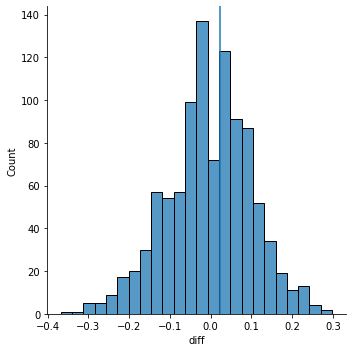

In [16]:
sns.displot(perm_results['diff'], kde=False)

plt.axvline(diferencia_en_proporcion);

In [17]:
(perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0]

0.436

In [18]:
perm_results.shape[0]

1000